Name: Vedika Desai  
Roll no 21102B0060  
Batch 4  
BE CMPN-B  
github: https://github.com/desaivedika/ML-Exp_Sem-7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
dataframe = pd.read_csv('facebook_combined.txt', sep=' ',header=None, names=['user_id', 'friend_id'])

In [ ]:
dataframe

,user_id,friend_id
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [ ]:
!pip install networkx==2.8.8
import networkx as nx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
graph = nx.from_pandas_edgelist(dataframe, 'user_id', 'friend_id')

In [ ]:
graph

In [ ]:
adjacency_matrix = nx.adjacency_matrix(graph)

<ipython-input-13-5cfb424fb963>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(graph)


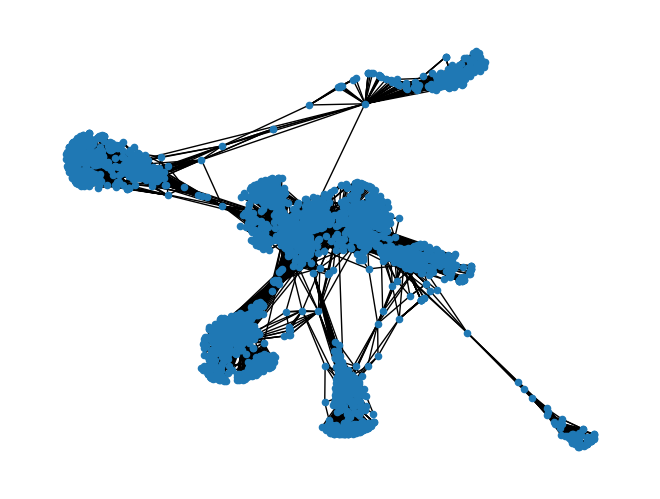

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.from_scipy_sparse_array(adjacency_matrix)

pos = nx.spring_layout(graph)

nx.draw(graph, pos=pos, with_labels=False, node_size=20)

plt.show()


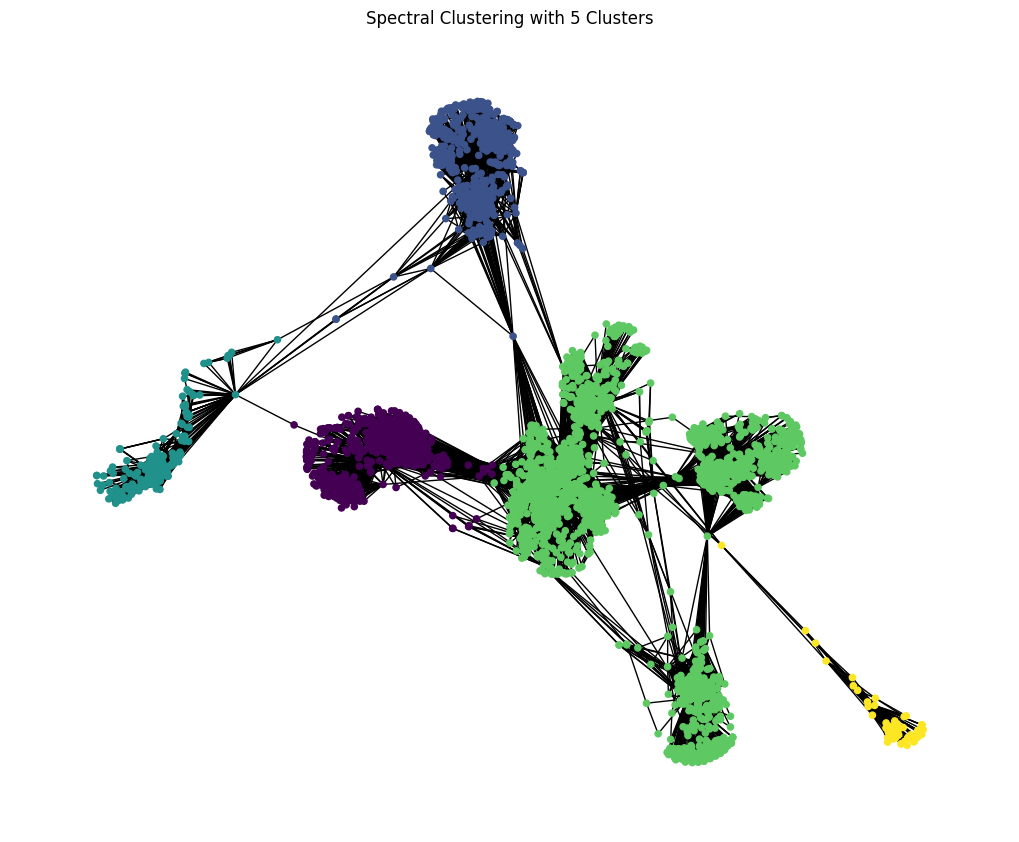

In [ ]:

adjacency_matrix_dense = adjacency_matrix.toarray()

num_clusters = 5
spectral_clustering = SpectralClustering(
    n_clusters=num_clusters,
    affinity='precomputed',
    random_state=42
)
labels = spectral_clustering.fit_predict(adjacency_matrix_dense)

cluster_colors = np.array(labels)

pos = nx.spring_layout(graph)

plt.figure(figsize=(10, 8))
nx.draw(
    graph,
    pos=pos,
    node_color=cluster_colors,
    with_labels=False,
    node_size=20,
    cmap=plt.cm.viridis
)

plt.title(f"Spectral Clustering with {num_clusters} Clusters")
plt.show()


In [ ]:
silhouette_avg = silhouette_score(adjacency_matrix_dense, labels, metric='precomputed')
print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg:.3f}")

Silhouette Score for 5 clusters: -1.000
